## Import bibliotek.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Wczytanie zbiorów.

In [2]:
tr = pd.read_parquet('dane/tr.parquet') # dane sprzedażowe - TR
va = pd.read_parquet('dane/va.parquet') # dane sprzedażowe - VA

## 2. Analiza jednowymiarowa.

### 2.1. Ćwiczenie 1.
* Wczytaj poprawnie zbiór `adult.csv` z katalogu "dane". Brakujące wartości zostały oznaczone w nim poprzez "?".

In [8]:
ramka = pd.read_csv('dane/adult.csv', na_values='?')
ramka

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


* Sprawdź, czy zbiór zawiera jakiekolwiek brakujące informacje. Jeśli tak, to dla zmiennej kategorycznych, uzupełnij je wartością "NA".

In [10]:
ramka.isnull().sum()
ramka.fillna('NA', inplace=True)
ramka

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


* Sprawdź liczności w zmiennej "workclass". Wszystkie klasy, które stanowią mniej niż 1% zbioru umieść w jednej kategorii o nazwie "other".

In [51]:
ramka.workclass.value_counts(normalize=True)*100

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
NA                   5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64

* Korzystając ze zmiennej "education" odpowiedz na pytanie, jakie jest najpopularniejsze wykoształcenie w zbiorze.

In [53]:
ramka['workclass'].replace({
    'Without-pay': 'Other',
    'Never-worked': 'Other'
}, inplace=True)
ramka.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

* Czy w zbiorze mamy więcej osób po rozwodzie, czy bez nigdy niezamężnych/nieżonatych?

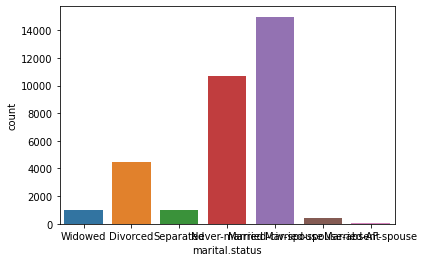

In [54]:
sns.countplot(data=ramka, x='marital.status')
plt.show()

* Czy więcej obserwacji zarabia powyżej, czy poniżej 50 tys. rocznie?

In [44]:
ramka.groupby('income').describe()

age                                                       fnlwgt  \
          count       mean        std   min   25%   50%   75%   max    count   
income                                                                         
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0  24720.0   
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0   7841.0   

                      ... capital.loss         hours.per.week             \
                mean  ...          75%     max          count       mean   
income                ...                                                  
<=50K   190340.86517  ...          0.0  4356.0        24720.0  38.840210   
>50K    188005.00000  ...          0.0  3683.0         7841.0  45.473026   

                                                
              std  min   25%   50%   75%   max  
income                                          
<=50K   12.318995  1.0  35.0  40.0  40.0  99.0  
>50K    11.012971  1.0  40.0  40.0  50.0  99.0  

[2 rows x 48 columns]

### 2.2. Ćwiczenie 2.
* Z katalogu "dane" wczytaj zbiór `data_science_salaries.csv`.

In [48]:
dane = pd.read_csv('dane/data_science_salaries.csv')
dane

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Machine Learning Engineer,160000,USD,160000,IN,100,IN,L
1,2023,SE,FT,Principal Data Engineer,85000,EUR,91773,ES,100,ES,M
2,2023,SE,FT,Data Analyst,120350,USD,120350,US,100,US,M
3,2023,SE,FT,Data Analyst,74400,USD,74400,US,100,US,M
4,2023,SE,FT,Data Scientist,281000,USD,281000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
5924,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
5925,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
5926,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
5927,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


* Załóżmy, że będziemy starali się wyjaśnić co wpływa na poziom zarobków w branży Data Science. Sprawdź na wykresie gęstości rozkład zmiennej celu "salary_in_usd".

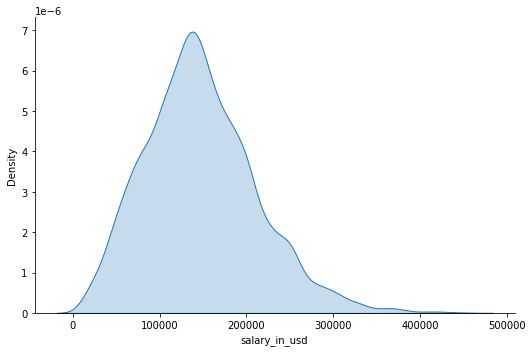

In [49]:
sns.displot(dane.salary_in_usd, kind='kde', fill=True, aspect=1.5)
plt.show()

* Czy zmienna celu wymaga logarytmowania ze względu na skośność? A może lepiej usunąć część obserwacji, które zarabiają powyżej 300000 dolarów rocznie?
    * Sprawdź oba podejścia na wykresie gęstości (logarytmowanie i usuwanie wartości odstajacych).
    * Ile obserwacji stracimy, jeśli zdecydujemy się odrzucić obserwacje zarabiające powyżej 300000 dolarów?
    * Jaką część zbioru będą stanowiły te obserwacje?

In [55]:
dane.shape

(5929, 11)

* Ogranicz zbiór tylko do obserwacji, które zarabiają poniżej 300000 dolarów rocznie.

In [57]:
dane[dane.salary_in_usd>300000].shape

(106, 11)

### 2.3. Ćwiczenie 3.
* Użyj zbioru uczącego, dotyczącego danych sprzeażowych "Produktu A" (wczytane do zmiennej `tr`), wykonaj poniższe polecenia i odpowiedz na pytania.

* Podejrzyj zbiór z użyciem metody `.head()`, by przypomnieć sobie jego strukturę.

* Na wykresie gęstości podejrzyj rozkład zmiennej celu - "sprzedaz". Jakiej statystyki możemy użyć do podsumowania tych danych (wyznaczyć miarę centralną - średnia vs mediana)? Uzasadnij odpowiedź.

* Na powyższym wykresie powinieneś dostrzec bimodalność. Jak myslisz, z czego ona wynika? Skorzystaj z metody `.value_counts()`, by sprawdzić, które wartości występowały najczęściej.

* Sprawdź rozkład zmiennej "srednia_cena_ropy_0_29d". Czy jest w niej coś nietypowego? Opisz jej rozkład.

* Korzystając z grupowania, sprawdź, które miasto sprzedało najwięcej produktów. Czy przewaga nad drugim miastem jest znaczna?

* Korzystając z metody `describe()` opisz, jak wyglądała przeciętna sprzedaż w Warszawskich drogeriach. Następnie zrób to samo dla trójmiasta. Zwróć uwagę na takie statystyki jak: mediana, 25%, 75%. Czy Warszawskie sklepy rzeczywiście sprzedają znacznie lepiej?

## 3. Analiza dwuwymiarowa.

### 3.1. Ćwiczenie 4.
* Spośród poniższych zmiennych zmiennych, sprawdź, które z nich będą najbardziej perspektywistyczne podczas modelowania (najmocniej skorelowane ze zmienną celu).

In [89]:
zmienne = ['sprzedaz', 'srednia_sprzedaz_0_2d', 'srednia_sprzedaz_0_6d',
           'srednia_sprzedaz_0_13d', 'srednia_cena_ropy_0_6d',
           'srednia_cena_ropy_0_29d', 'rok_dzialalnosci', 'sprzedaz_minus_1t']

In [90]:
zmienne

['sprzedaz',
 'srednia_sprzedaz_0_2d',
 'srednia_sprzedaz_0_6d',
 'srednia_sprzedaz_0_13d',
 'srednia_cena_ropy_0_6d',
 'srednia_cena_ropy_0_29d',
 'rok_dzialalnosci',
 'sprzedaz_minus_1t']

* Spośród zmiennych sprawdź, które są ze sobą mocno skorelowane (współczynnik korelacji > 0.5) i spośród nich wybierz reprezentantów, którzy są najmocniej skorelowani ze zmienną celu. 

In [97]:
tr[zmienne].corr()

,sprzedaz,srednia_sprzedaz_0_2d,srednia_sprzedaz_0_6d,srednia_sprzedaz_0_13d,srednia_cena_ropy_0_6d,srednia_cena_ropy_0_29d,rok_dzialalnosci,sprzedaz_minus_1t
sprzedaz,1.000000,0.735593,0.766119,0.783053,-0.048006,-0.047540,0.061205,-0.048134
srednia_sprzedaz_0_2d,0.735593,1.000000,0.946984,0.920610,-0.056323,-0.053763,0.065783,-0.056521
srednia_sprzedaz_0_6d,0.766119,0.946984,1.000000,0.975683,-0.058116,-0.055611,0.069094,-0.058069
srednia_sprzedaz_0_13d,0.783053,0.920610,0.975683,1.000000,-0.057923,-0.055877,0.070890,-0.057952
srednia_cena_ropy_0_6d,-0.048006,-0.056323,-0.058116,-0.057923,1.000000,0.991462,-0.795705,0.997669
srednia_cena_ropy_0_29d,-0.047540,-0.053763,-0.055611,-0.055877,0.991462,1.000000,-0.800862,0.986274
rok_dzialalnosci,0.061205,0.065783,0.069094,0.070890,-0.795705,-0.800862,1.000000,-0.793860
sprzedaz_minus_1t,-0.048134,-0.056521,-0.058069,-0.057952,0.997669,0.986274,-0.793860,1.000000


### 3.2. Ćwiczenie 5.

In [80]:
zarobki_ds = pd.read_csv('dane/data_science_salaries.csv') # płace w Data Science
zarobki_ds = zarobki_ds[zarobki_ds.salary_in_usd < 300000]
zarobki_ds

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Machine Learning Engineer,160000,USD,160000,IN,100,IN,L
1,2023,SE,FT,Principal Data Engineer,85000,EUR,91773,ES,100,ES,M
2,2023,SE,FT,Data Analyst,120350,USD,120350,US,100,US,M
3,2023,SE,FT,Data Analyst,74400,USD,74400,US,100,US,M
4,2023,SE,FT,Data Scientist,281000,USD,281000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
5923,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
5925,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
5926,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
5927,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


* Czy duże firmy płacą pracownikom więcej niż średnie?

In [93]:
zarobki_ds.groupby(['company_size']).salary_in_usd.mean()
# sns.boxplot(data=wages, x='sex', y='earn_log10')
# plt.show()

company_size
L    126036.818336
M    146945.802684
S     85378.552632
Name: salary_in_usd, dtype: float64

* Sprawdź jak w firmach o różnych rozmiarach ("company_size"), poziomy pracy zdalnej ("remote_ratio") wpływa na zarobki ("salary_in_usd"). Czy można mówić tu o interakcji?

In [99]:
pd.crosstab(index=zarobki_ds.company_size,
            columns=zarobki_ds.remote_ratio,
            values=zarobki_ds.salary_in_usd,
            aggfunc='mean'
           )

remote_ratio,0,50,100
company_size,,,
L,155529.514768,83082.898305,117826.534188
M,149724.775833,70345.063830,144674.537073
S,100538.800000,78173.200000,84000.086957


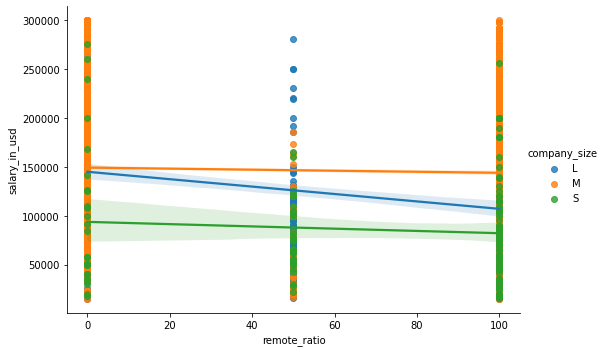

In [101]:
sns.lmplot(data=zarobki_ds, x='remote_ratio', y='salary_in_usd', hue='company_size', aspect=1.5)
plt.show()

### 3.3. Ćwiczenie 6.
Korzystając z poniższego zbioru odpowiedz na niżej zamieszczone pytania.

In [100]:
place = pd.read_csv('dane/adult.csv', na_values='?') # płace
place

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


* Czym charakteryzują się osoby dobrze zarabiające?